# US Baby Names 1880-2010

The baby names datasets are contained in the acompanying folder ./names (or [download here](http://www.ssa.gov/oact/babynames/limits.html)) they contain a list of the most frequent names given to newborn babies in the United States each year.
There are many things you might want to do with the dataset:

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters.
* Analyze external sources of trends: biblical names, celebrities, demographic changes.

In this exercise you are tasked with undertaking some analysis. I have started some of the steps for you and I have given some tips on what methods to use.


## Task 1: Import Data

As with most analysis we will need to import some libraries. For this analyis we want to reading the data, perform analysis and visualise the data. therefore the Pandas and matplotlib libraries are needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

First open a single file 1880 set the field headings to'name', 'sex', 'births' (hint use the pandas read_csv method)

In [2]:
columns = ['name', 'sex', 'births']

df = pd.read_csv('./names/yob1880.txt', sep=',', names=columns) #Set header to name,sex,births

df.index = df.index + 1 # Set first index to 1 instead of 0
print(df)

           name sex  births
1          Mary   F    7065
2          Anna   F    2604
3          Emma   F    2003
4     Elizabeth   F    1939
5        Minnie   F    1746
...         ...  ..     ...
1996     Woodie   M       5
1997     Worthy   M       5
1998     Wright   M       5
1999       York   M       5
2000  Zachariah   M       5

[2000 rows x 3 columns]


Now display the top 5 rows

In [3]:
print(df.head(5))

        name sex  births
1       Mary   F    7065
2       Anna   F    2604
3       Emma   F    2003
4  Elizabeth   F    1939
5     Minnie   F    1746


Often datasets span more than one file. 

In this example each year is in a seperate file, we need to combines all of this year data into a single pandas DataFrame and add a *year* field. Note that all .txt files must be stored as *./names*.

This is a little challenging so I have completed this task below, make sure you understand how the code below operates.

In [71]:
years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = "./names/yob%d.txt" % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


Now display the first 5 records from the combined dataframe

In [5]:
print(names.head(5))

        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880


## Task 2: Descriptive Statistics

Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. 

Display the following summary statistics.

    Count.
    Mean.
    Standard Deviation.
    Minimum Value.
    25th Percentile.
    50th Percentile (Median). 75th Percentile.
    Maximum Value.



In [7]:
# Statistical Summary
years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = "./names/yob%d.txt" % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

print(names.describe())

             births          year
count  5.278866e+06  5.278866e+06
mean   1.874828e+02  1.971086e+03
std    1.590406e+03  3.318362e+01
min    5.000000e+00  1.880000e+03
25%    7.000000e+00  1.947000e+03
50%    1.200000e+01  1.980000e+03
75%    3.200000e+01  1.999000e+03
max    9.968600e+04  2.012000e+03


## Task 3: Data Aggregation

We can now perform several types of aggregation. 

Create a new DataFrame containing the total number of births per year, split by sex. 

(Hint use the pivot_table method with the aggragate function sum property)

In [16]:
df = pd.pivot_table(data=names, index='year', columns='sex', values='births', aggfunc='sum')

print(df)

sex         F        M
year                  
1880   272979   331473
1881   275859   302229
1882   323541   341058
1883   336957   313881
1884   387060   343326
...       ...      ...
2008  5665821  6113253
2009  5503797  5943117
2010  5324274  5747826
2011  5268012  5687730
2012  5271984  5679402

[133 rows x 2 columns]


Now display the first 5 records from the combined dataframe. Hint you can use the head() method.

In [15]:
print(df.head(5))

sex        F       M
year                
1880  272979  331473
1881  275859  302229
1882  323541  341058
1883  336957  313881
1884  387060  343326


## Task 4: Data Visualisation

Using the *plot* function draw a figure to illustrate this DataFrame. 

Plot the genders in 2 seperate lines with year on the X axis and the number of births on the Y axis, Don't forget a title and axis labels.

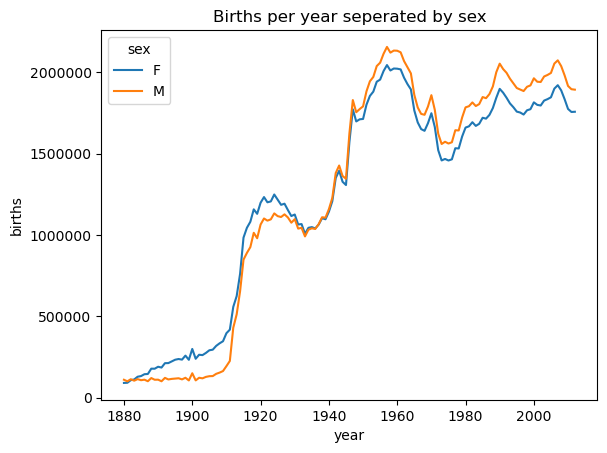

In [53]:
df = pd.pivot_table(data=names, index='year', columns='sex', values='births', aggfunc='sum')

df.plot(kind='line')

plt.xlabel("year")

plt.ylabel("births")

plt.title("Births per year seperated by sex")

plt.ticklabel_format(style='plain')

plt.show()

## Task 5: More Data Aggregation

Now we would like to analyse how frequently the names *John*, *Michael*, *Mary*, *Mark*,*Jeremy* and *Amelia* occurr over time.

Redefine *total_births*, this time aggregating data by *name* rather than *sex*.

Then define the subset of names that we are interested

Finally plot each name in its own graph.

In [92]:
df = names.pivot_table(index="year", columns="name", values="births", aggfunc="sum")
print(df)

designated_Names = ['John', 'Michael', 'Mary', 'Mark', 'Jeremy', 'Amelia']

# filter by designated names
df = names.pivot_table(index="year", columns=df.columns.isin(designated_Names), values="births", aggfunc="sum")
print(df) 

name  Aaban  Aabha  Aabid  Aabriella  Aadam  Aadan  Aadarsh   Aaden  Aadesh  \
year                                                                          
1880    NaN    NaN    NaN        NaN    NaN    NaN      NaN     NaN     NaN   
1881    NaN    NaN    NaN        NaN    NaN    NaN      NaN     NaN     NaN   
1882    NaN    NaN    NaN        NaN    NaN    NaN      NaN     NaN     NaN   
1883    NaN    NaN    NaN        NaN    NaN    NaN      NaN     NaN     NaN   
1884    NaN    NaN    NaN        NaN    NaN    NaN      NaN     NaN     NaN   
...     ...    ...    ...        ...    ...    ...      ...     ...     ...   
2008    NaN    NaN    NaN        5.0    6.0   22.0     13.0   956.0     NaN   
2009    6.0    NaN    NaN        NaN    9.0   23.0     16.0  1272.0     5.0   
2010    9.0    NaN    NaN        NaN    7.0   11.0      NaN   450.0     NaN   
2011   11.0    7.0    NaN        NaN   17.0   11.0      7.0   275.0     5.0   
2012   11.0    5.0    NaN        NaN   11.0   11.0  

ValueError: Grouper and axis must be same length

## Task 6: Data Distrabution

Next we need to look at how the distribution of boy names by final letter has changed over the last 100 years. 

To see this, first aggregate all of the births in the full dataset by year, sex, and final letter.

(This is a bit tricky so I have done some of the difficult bits)

In [10]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',last_letters,['sex', 'year'], aggfunc=sum)


Then we select a few representative years 1912, 1962, 2012, spanning 100 years in total, display the first 5 records in a table:

(Hint: use the reindex method https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html)

Now, we normalize the table by the number of births, so as to obtain the proportion of total births for each sex ending in each letter: 

There are functions in python for normalisation but we haven't covered them yet. Here we will just simply divide each value by the aggragated sum for that table. i.e. divide each subtable by the total 

In [12]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head()

sex                 F                             M                    
year             1912      1962      2012      1912      1962      2012
last_letter                                                            
a            0.267288  0.347073  0.372450  0.003849  0.002577  0.014368
b                 NaN  0.000233  0.000268  0.002147  0.001672  0.018333
c                 NaN  0.000037  0.000703  0.002449  0.008644  0.012819
d            0.018854  0.001868  0.001440  0.125806  0.120849  0.022427
e            0.323448  0.215983  0.182395  0.127262  0.079738  0.067840

Finally make <b>bar plots</b> for each sex broken-down by year


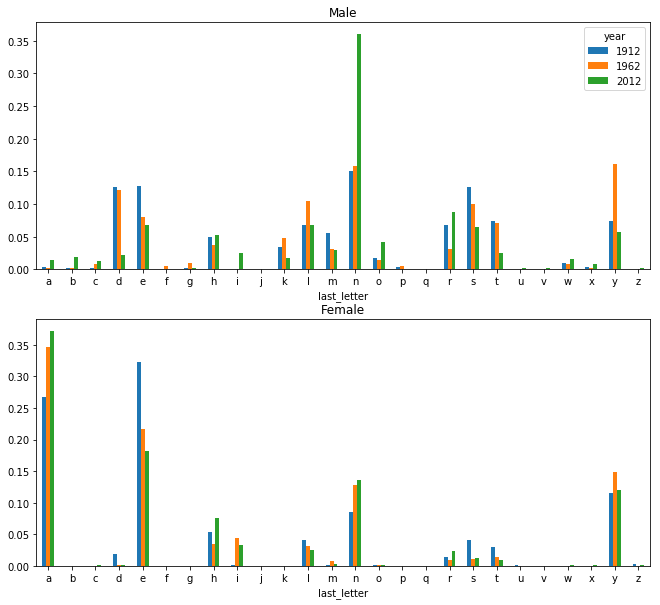

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)
